## Importing Libraries of conv_visualiser package

In [1]:
!pip install conv-visualiser==0.3

In [2]:
from cnn_visualiser import GRAD_CAM
from cnn_visualiser import GradVisualiser
from cnn_visualiser import IntermediateActivations
from cnn_visualiser import VanillaGradients

## Importing Necessary packages 

In [2]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Making Image  model ready
Preprocessing Images

In [ ]:
path = "./Input_Images/cat_dog.png" #path to image
vgg_model = vgg16.VGG16(weights = 'imagenet',input_shape=(224,224,3),include_top=True)
img = image.load_img(path,target_size=(224,224)) #make sure the dimensions of the image matches with the input_shape
img = image.img_to_array(img)
img = preprocess_input(img) #make sure the image is preprocessed
img = np.expand_dims(img,axis = 0)# adding a batch dimension

## Generating heatmaps and outputs mention in GRAD CAM paper
### reference https://arxiv.org/abs/1610.02391

In [ ]:
grad_cam = GRAD_CAM(model=vgg_model,input_image=img,layer_name='block5_conv3')
superimposed_image = grad_cam.get_superimposed(path) #heatmap superimposed on the original image

### All the outputs are stored in the path mentioned

In [ ]:
cv2.imwrite('./Output/superimposed_image.png',superimposed_image)#Saving the image

True

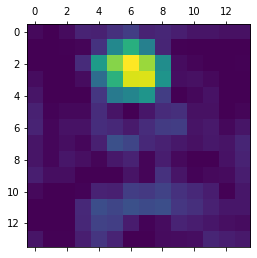

In [ ]:
heatmap = grad_cam.get_heat_map()
plt.matshow(heatmap)

In [ ]:
guided_grads_cam = grad_cam.get_guided_grad_cam()
cv2.imwrite('./Output/guided_grads_cam.png',guided_grads_cam)

True

## Generating gradients using Guided Backpropagtion Algorithm

In [ ]:
grad_visualiser = GradVisualiser(model=vgg_model,layer_name='block4_conv3',input_image=img)

In [ ]:
guided_grads = grad_visualiser.guided_gradients()

In [ ]:
cv2.imwrite('./Output/guided_grads.png',guided_grads)

True

## Generating intermediate filters using Gradient Ascent Algorithm

In [ ]:
vg = VanillaGradients(model = vgg_model,input_image = img)
filter_pattern = vg.generate_filter_pattern(filter_index=10,layer_name = 'block2_conv1',input_height=224,input_width=224)

In [ ]:
cv2.imwrite('./Output/filter_pattern.png',filter_pattern)

True

In [ ]:
grads = vg.vanilla_gradients(class_label = 245)

In [ ]:
cv2.imwrite("./Output/vanilla_grads.png",grads)

True

## Generating intermediate activation functions

### warning mention layer_names in layer directory in a sequence of a particular block

/home/rachit/Projects/conv_visualiser/cnn_visualiser/intermediate_activations.py:42: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


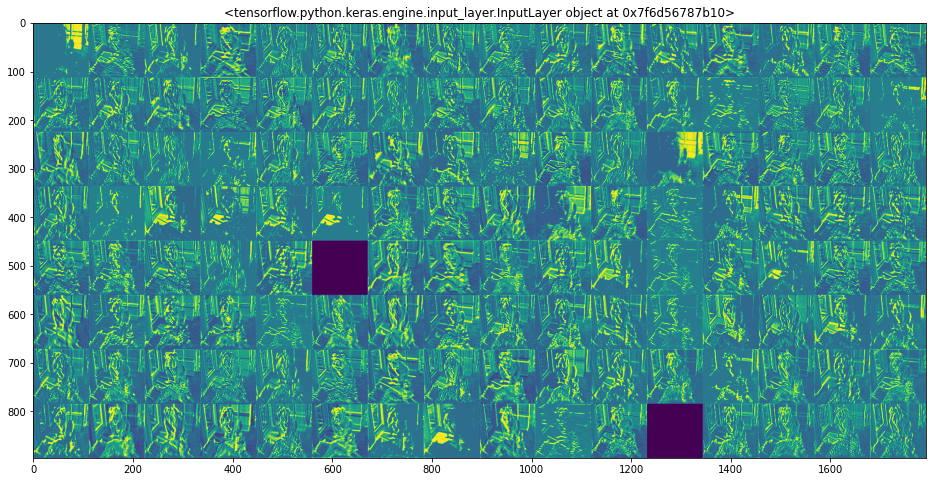

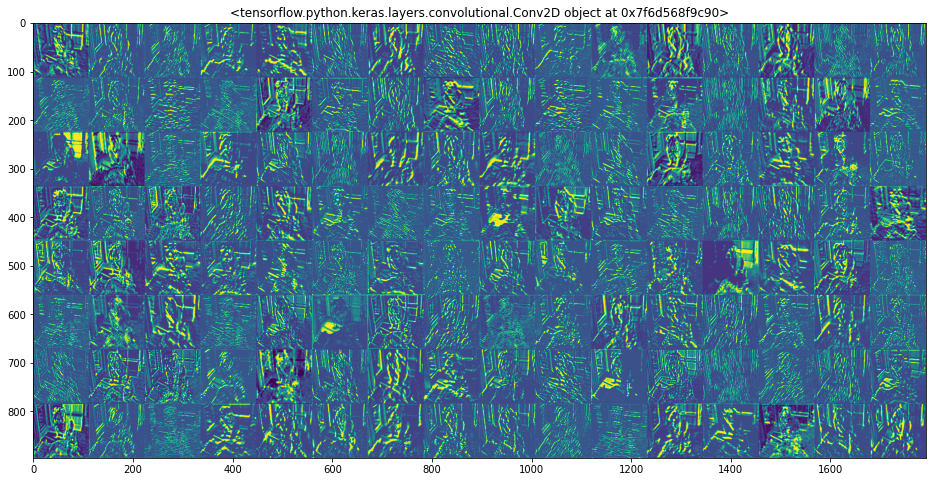

In [ ]:
ia = IntermediateActivations(model=vgg_model,layer_names = ['block2_conv1','block2_conv2'])
ia.display_grid(input_image=img) #Matplotlib Plot

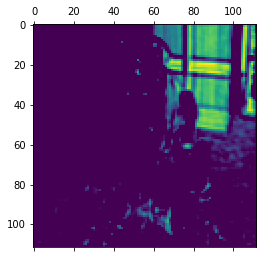

In [ ]:
ia.display_single_channel(input_image = img)

In [ ]:
cv2.imwrite("./Output/vanilla_grads.png",grads)

True

## Integrated Gradients Output

In [3]:
# Integradient Gradients Output
from cnn_visualiser import IntegratedGradients

In [4]:
from tensorflow.keras.applications import inception_v3

path = '/content/cat_dog.png'
img = image.load_img(path,target_size = (299,299,3))
img = image.img_to_array(img)
img = np.expand_dims(img,axis = 0)
img = inception_v3.preprocess_input(img)

model = inception_v3.InceptionV3(weights = 'imagenet',input_shape = (299,299,3),include_top=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


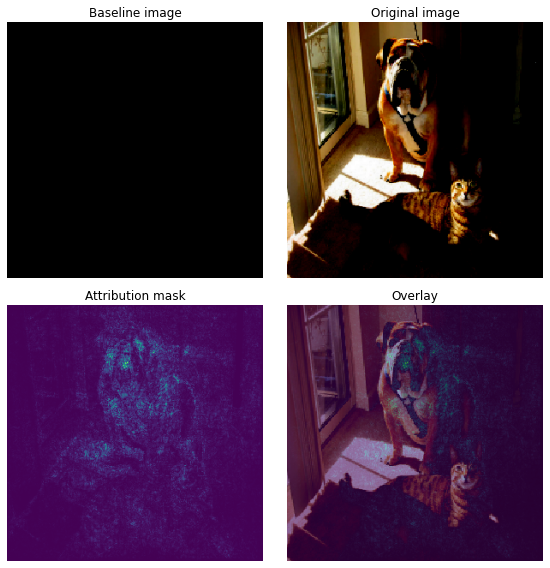

In [5]:
ig = IntegratedGradients(model = model,input_image = img)
ig.display_plot_img_attributions()